# Cody.mp3 Project workbook
This notebook will guide you step by step to build the ML model you need for the audio analysis 

In [59]:
# First, we are goign to import everything you need for the project
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

## Part 1: Visualizing the audio file 

In [39]:
#Write the code which would read the csv file "features_3_sec.csv". Then, load the first 5 rows of the dataframe. 
#Hint: Make sure the path to the file is correct 
music = pd.read_csv("Downloads/archive/Data/features_3_sec.csv")
music.loc[:4]

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [3]:
# Compute the shape of the data 
music.shape

(9990, 60)

In [4]:
# Compute the data type 
music.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [5]:
# Choose a random audio from the dataset and compute the data array and the sample rate (the sample rate default is 22050)
# Hint: https://librosa.org/doc/main/generated/librosa.load.html
data,sr = librosa.load(path='Downloads/archive/Data/genres_original/blues/blues.00000.wav')
data

array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
       -0.06106567, -0.06417847], dtype=float32)

In [6]:
# Take short time fourier transform of the signal 
audio = librosa.stft(data) 

In [7]:
# Now import IPython and play the audio file 
ipd.Audio(data, rate=sr)

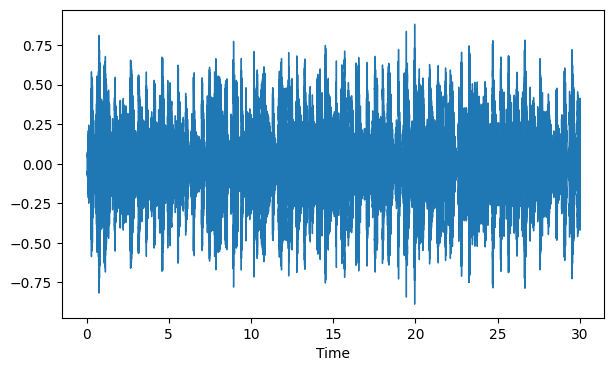

In [8]:
# Plot the waveform of the audio. 
plt.figure(figsize=(7,4))
librosa.display.waveshow(data, sr=sr)

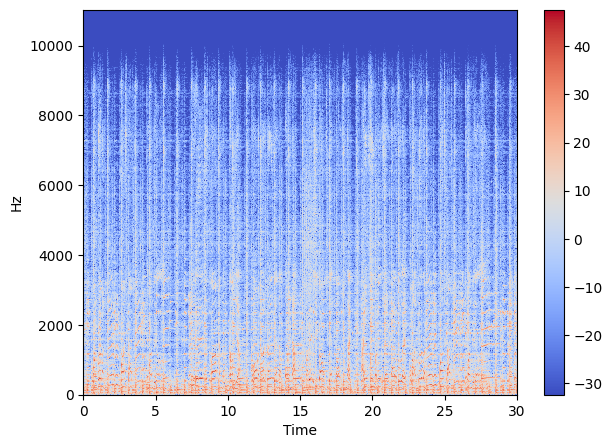

In [9]:
# Draw the spectrogram of the audio file 
audiodb = librosa.amplitude_to_db(abs(audio))
plt.figure(figsize=(7, 5))
librosa.display.specshow(audiodb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

**Spectral roll off:** The frequency under some cutoff value of the total energy of the spectrum is obtained. This could be used to differentiate from the harmonic and noisy sounds. 

In [10]:
# Compute the rolloff frequency for each frame in a given signal. 
librosa.feature.spectral_rolloff(y=data, sr=sr)

array([[4705.00488281, 4640.40527344, 4715.77148438, ..., 2616.28417969,
        3003.88183594, 2939.28222656]])

**Chroma feature:** Chroma feature is closely related with the twelve different pitch classes. This is why chroma based feature is also called pitch class profiles. Harmonic and melodic characteristics of music are captured by the chroma graph.  

In [11]:
# Compute the chroma features for the audio 
import librosa.display as lplt
librosa.feature.chroma_stft(y=data, sr=sr)

array([[0.33112544, 0.23492369, 0.87141633, ..., 0.1569107 , 0.8778623 ,
        1.        ],
       [0.39392975, 0.29400358, 0.6882651 , ..., 0.13222213, 0.6850759 ,
        0.72816855],
       [0.42932436, 0.41955492, 0.5160274 , ..., 0.25044864, 0.5649644 ,
        0.40339902],
       ...,
       [1.        , 1.        , 1.        , ..., 0.2619949 , 0.9551487 ,
        0.86573505],
       [0.42033258, 0.36797968, 0.6217583 , ..., 1.        , 1.        ,
        0.98580545],
       [0.30348286, 0.1970005 , 0.6492548 , ..., 0.62876105, 0.7172242 ,
        0.8162657 ]], dtype=float32)

**Zero crossing rate:** The rate of which signal transitions from positive to zero to negative or from negative to zero or simply said the number of times the signal crosses x-axis 

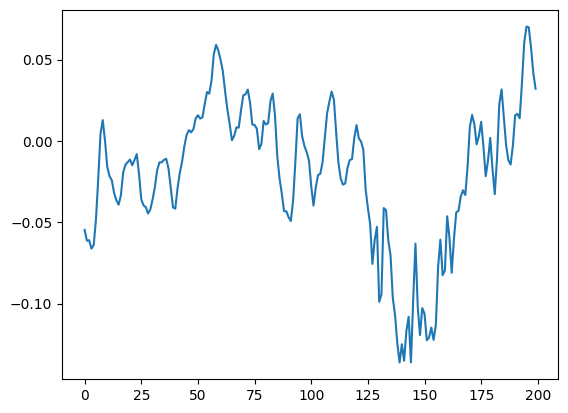

In [12]:
#Visualize the zero crossing rate 
start=1000
end=1200
plt.plot(data[1000:1200])

In [13]:
# Print the number of zero-crossing rate 
np.count_nonzero(librosa.zero_crossings(y=data))

55032

## Part 2: EDA
In this section, we will perform EDA for all the music genres. By visualizing wave plots and spectrograms, we will be able to see the different patterns depending on the genre. 

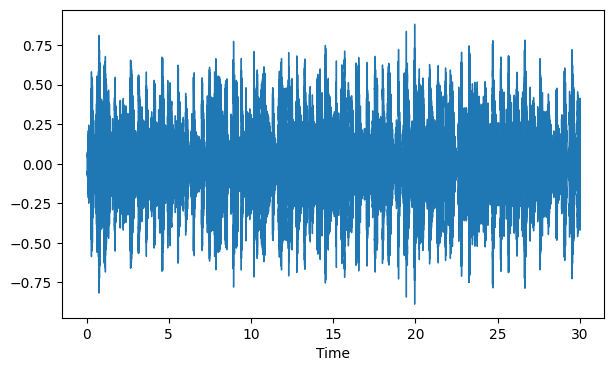

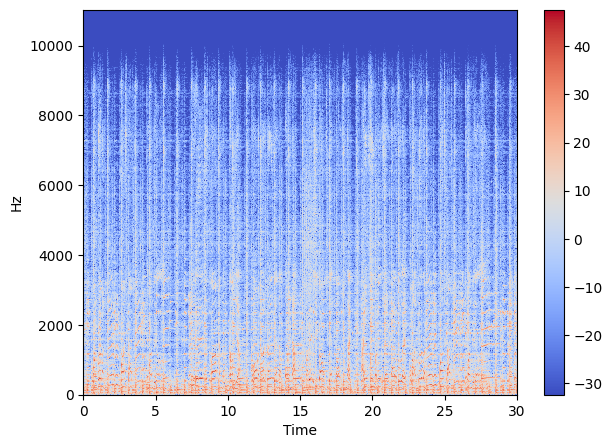

In [14]:
# BLUES
data,sr = librosa.load(path='Downloads/archive/Data/genres_original/blues/blues.00000.wav')
audio = librosa.stft(data) 

# Create a waveplot
plt.figure(figsize=(7,4))
librosa.display.waveshow(data, sr=sr)

# Create a log mel spectrogram 
audiodb = librosa.amplitude_to_db(abs(audio))
plt.figure(figsize=(7, 5))
librosa.display.specshow(audiodb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

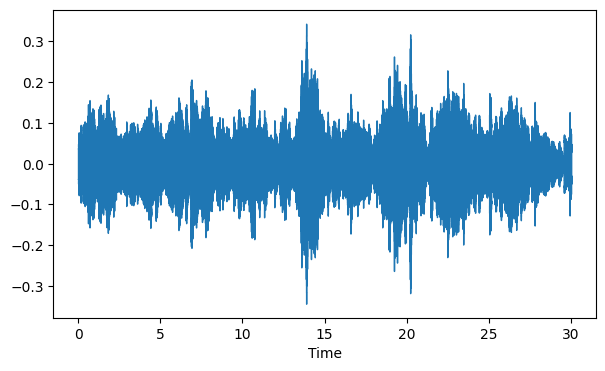

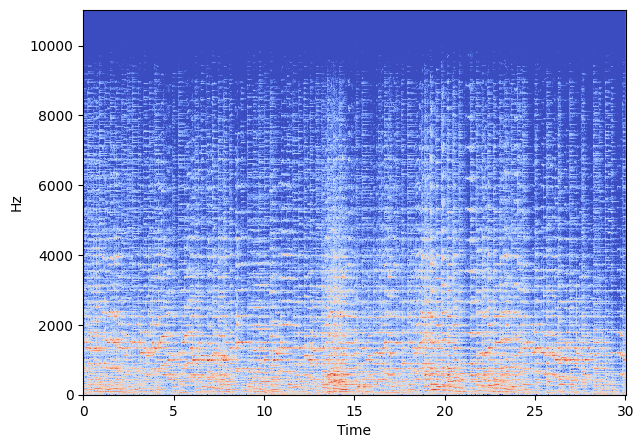

In [15]:
# CLASSICAL
data,sr = librosa.load(path='Downloads/archive/Data/genres_original/classical/classical.00000.wav')
audio = librosa.stft(data) 

# Create a waveplot
plt.figure(figsize=(7,4))
librosa.display.waveshow(data, sr=sr)

# Create a log mel spectrogram 
audiodb = librosa.amplitude_to_db(abs(audio))
plt.figure(figsize=(7, 5))
librosa.display.specshow(audiodb, sr=sr, x_axis='time', y_axis='hz')

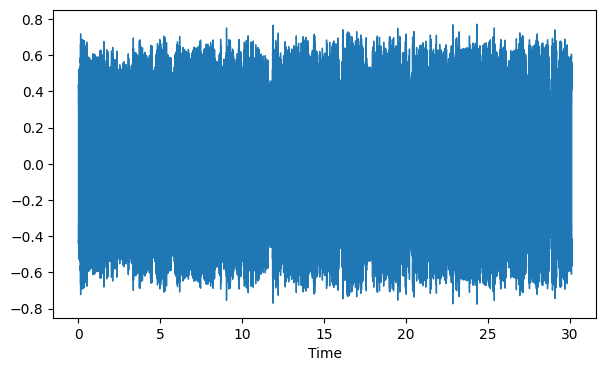

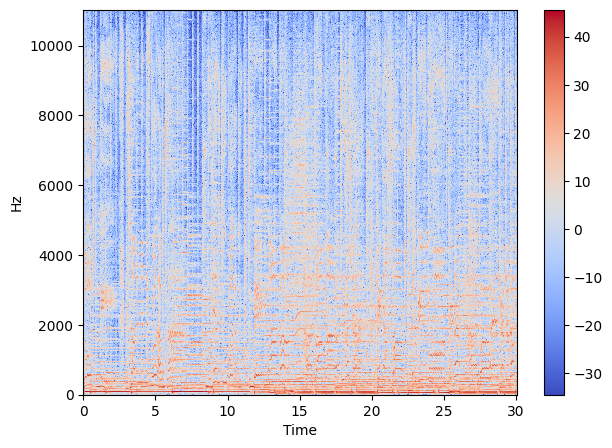

In [16]:
# COUNTRY 
data,sr = librosa.load(path='Downloads/archive/Data/genres_original/country/country.00000.wav')
audio = librosa.stft(data) 

# Create a waveplot
plt.figure(figsize=(7,4))
librosa.display.waveshow(data, sr=sr)

# Create a log mel spectrogram 
audiodb = librosa.amplitude_to_db(abs(audio))
plt.figure(figsize=(7, 5))
librosa.display.specshow(audiodb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

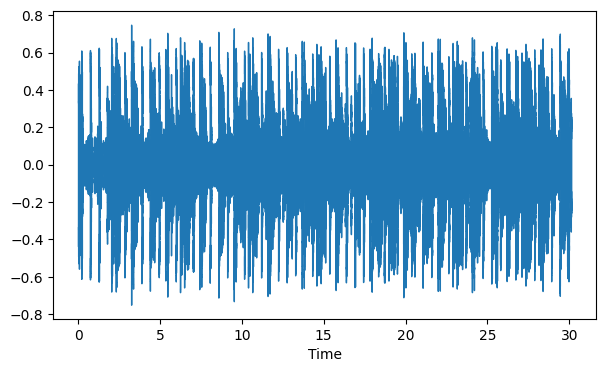

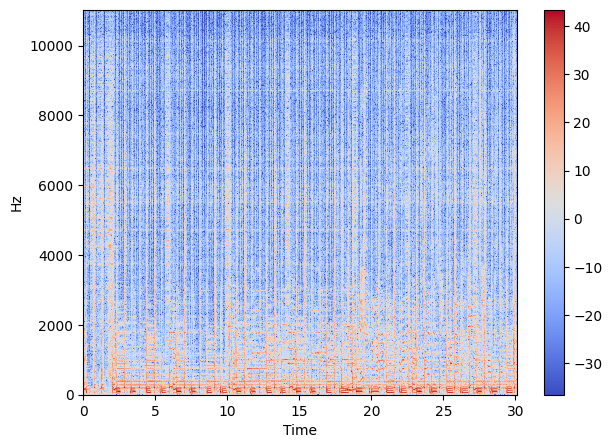

In [17]:
# DISCO
data,sr = librosa.load(path='Downloads/archive/Data/genres_original/disco/disco.00000.wav')
audio = librosa.stft(data) 

# Create a waveplot
plt.figure(figsize=(7,4))
librosa.display.waveshow(data, sr=sr)

# Create a log mel spectrogram 
audiodb = librosa.amplitude_to_db(abs(audio))
plt.figure(figsize=(7, 5))
librosa.display.specshow(audiodb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

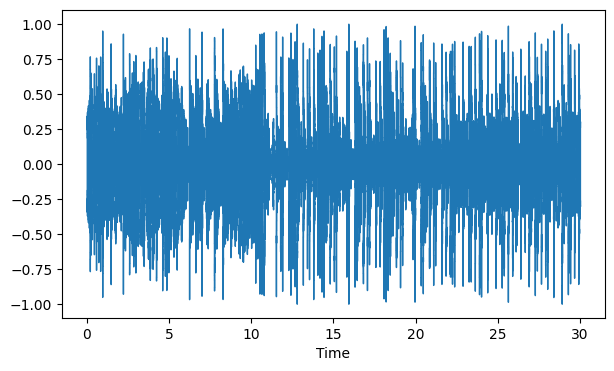

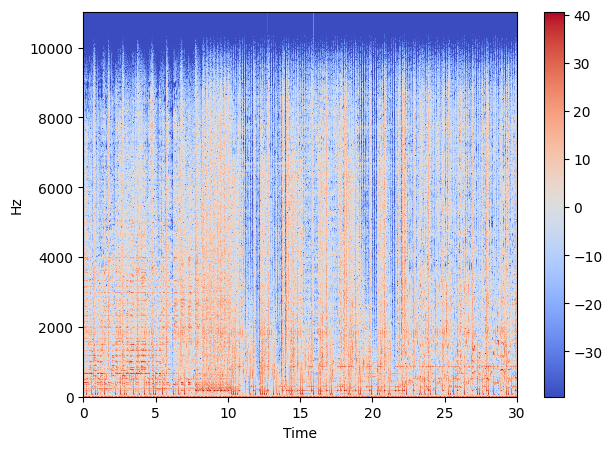

In [18]:
# HIPHOP
data,sr = librosa.load(path='Downloads/archive/Data/genres_original/hiphop/hiphop.00000.wav')
audio = librosa.stft(data) 

# Create a waveplot
plt.figure(figsize=(7,4))
librosa.display.waveshow(data, sr=sr)

# Create a log mel spectrogram 
audiodb = librosa.amplitude_to_db(abs(audio))
plt.figure(figsize=(7, 5))
librosa.display.specshow(audiodb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

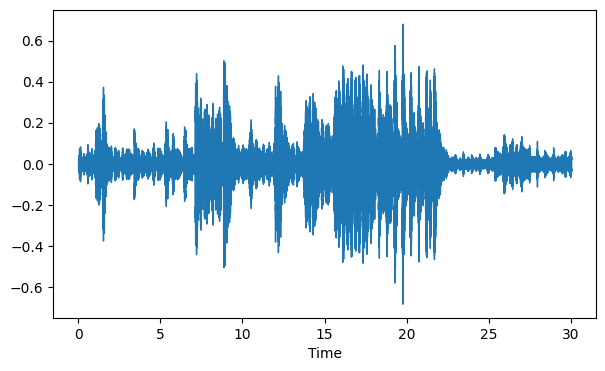

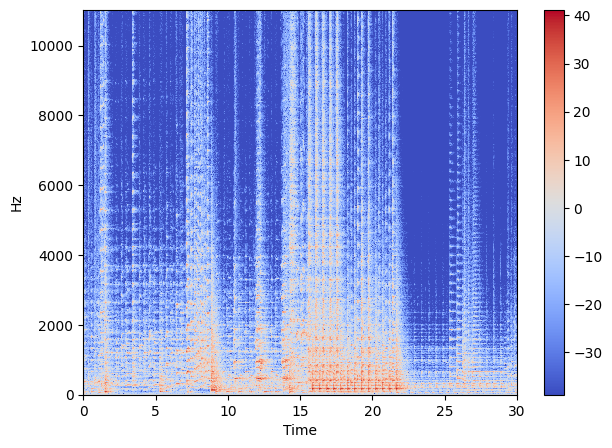

In [19]:
# JAZZ
data,sr = librosa.load(path='Downloads/archive/Data/genres_original/jazz/jazz.00000.wav')
audio = librosa.stft(data) 

# Create a waveplot
plt.figure(figsize=(7,4))
librosa.display.waveshow(data, sr=sr)

# Create a log mel spectrogram 
audiodb = librosa.amplitude_to_db(abs(audio))
plt.figure(figsize=(7, 5))
librosa.display.specshow(audiodb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

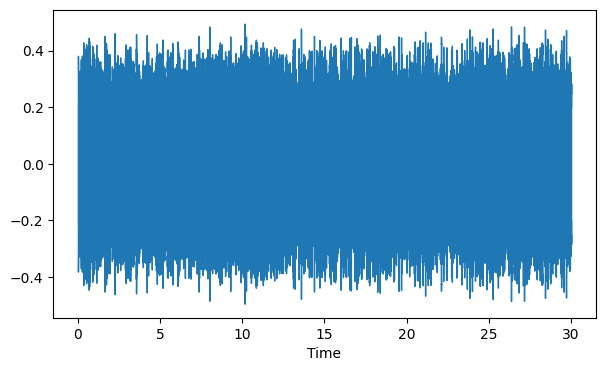

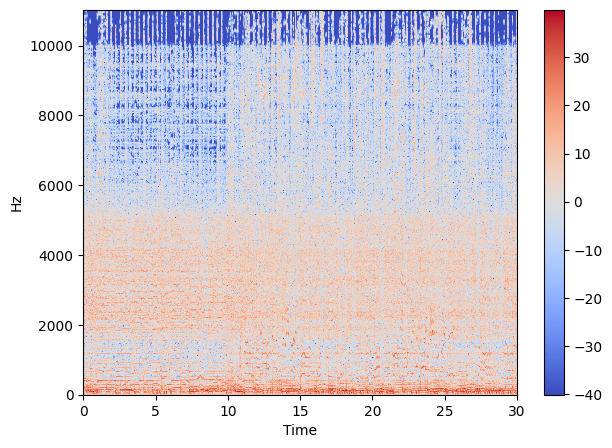

In [20]:
# METAL
data,sr = librosa.load(path='Downloads/archive/Data/genres_original/metal/metal.00000.wav')
audio = librosa.stft(data) 

# Create a waveplot
plt.figure(figsize=(7,4))
librosa.display.waveshow(data, sr=sr)

# Create a log mel spectrogram 
audiodb = librosa.amplitude_to_db(abs(audio))
plt.figure(figsize=(7, 5))
librosa.display.specshow(audiodb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

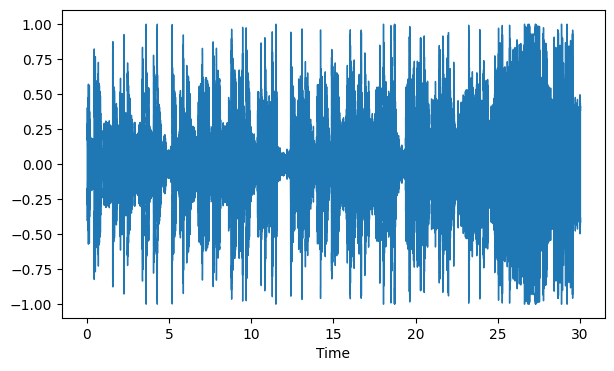

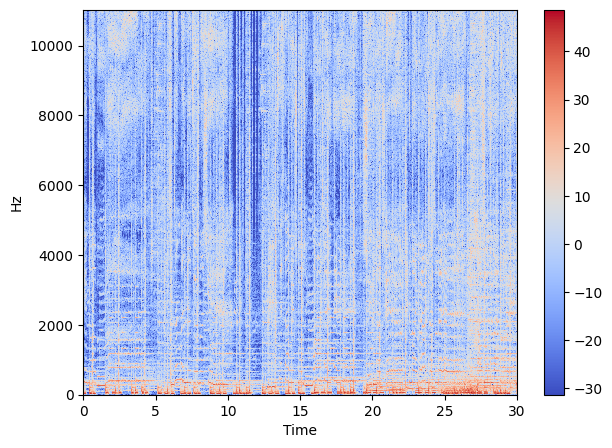

In [21]:
# POP
data,sr = librosa.load(path='Downloads/archive/Data/genres_original/pop/pop.00000.wav')
audio = librosa.stft(data) 

# Create a waveplot
plt.figure(figsize=(7,4))
librosa.display.waveshow(data, sr=sr)

# Create a log mel spectrogram 
audiodb = librosa.amplitude_to_db(abs(audio))
plt.figure(figsize=(7, 5))
librosa.display.specshow(audiodb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

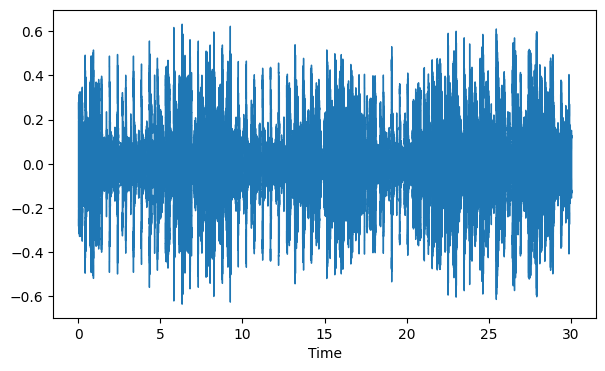

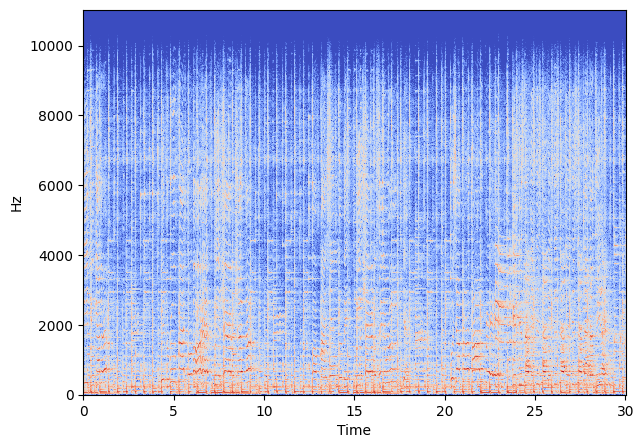

In [22]:
# REGGAE
data,sr = librosa.load(path='Downloads/archive/Data/genres_original/reggae/reggae.00000.wav')
audio = librosa.stft(data) 

# Create a waveplot
plt.figure(figsize=(7,4))
librosa.display.waveshow(data, sr=sr)

# Create a log mel spectrogram 
audiodb = librosa.amplitude_to_db(abs(audio))
plt.figure(figsize=(7, 5))
librosa.display.specshow(audiodb, sr=sr, x_axis='time', y_axis='hz')

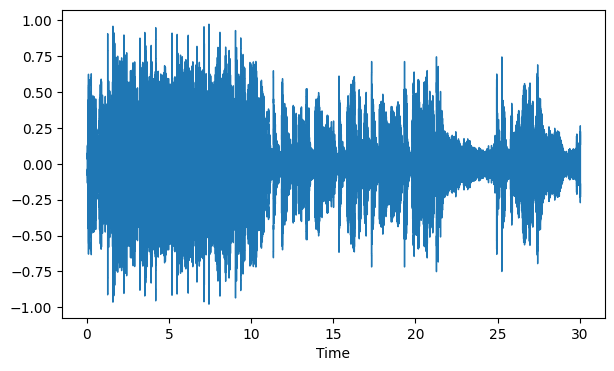

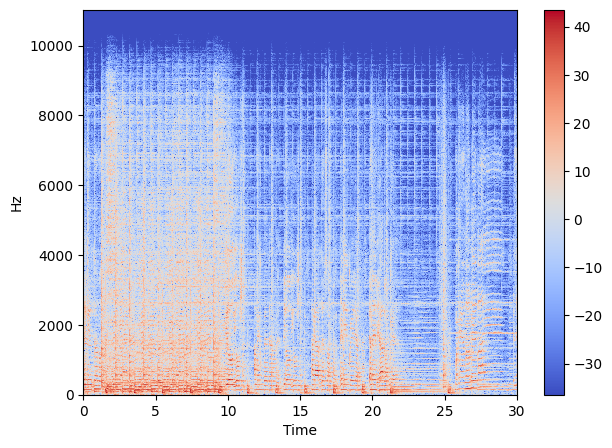

In [23]:
# ROCK 
data,sr = librosa.load(path='Downloads/archive/Data/genres_original/rock/rock.00000.wav')
audio = librosa.stft(data) 

# Create a waveplot
plt.figure(figsize=(7,4))
librosa.display.waveshow(data, sr=sr)

# Create a log mel spectrogram 
audiodb = librosa.amplitude_to_db(abs(audio))
plt.figure(figsize=(7, 5))
librosa.display.specshow(audiodb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [40]:
# Encode the categorical classes with numerical integer values for training 
# Blues - 0
# Classical - 1
# Country - 2
# Disco - 3
# Hip-hop - 4 
# Jazz - 5  
# Metal - 6 
# Pop - 7
# Reggae - 8
# Rock - 9

le = LabelEncoder()
le.fit(["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])

music["label"] = le.transform(music["label"])

In [41]:
# Print the resulting df
music

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
0     0.003521             1773.065032          167541.630869   
1     0.001450             1816.693777           90525.690866   
2     0.004620             1788.539719          111407.437613   
3     0.002448             1655.289045          111952.284517   
4     0.001701             1630.656199           79667.267654   
...        ...                     ...                    ...   
9985  0.000097             1499.083005          164266.886443   
9986  0.000088             1847.965128          281054.935973   
9987  0.000701             1346.157659          662956.246325   
9988  0.000320             2084.515327          203891.039161   
9989  0.000067             1634.330126          411429.169769   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                 1972.744388           117335.771563  ...   39.687145   
1                 2010.051501            65671.875673  ...   64.748276   
2                 2084.565132            75124.921716  ...   67.336563   
3                 1960.039988            82913.639269  ...   47.739452   
4                 1948.503884            60204.020268  ...   30.336359   
...                       ...                     ...  ...         ...   
9985              1718.707215            85931.574523  ...   42.485981   
9986              1906.468492            99727.037054  ...   32.415203   
9987              1561.859087           138762.841945  ...   78.228149   
9988              2018.366254            22860.992562  ...   28.323744   
9989              1867.422378           119722.211518  ...   38.801735   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0       -3.241280   36.488243     0.722209   38.099152    -5.050335   
1       -6.055294   40.677654     0.159015   51.264091    -2.837699   
2       -1.768610   28.348579     2.378768   45.717648    -1.938424   
3       -3.841155   28.337118     1.218588   34.770935    -3.580352   
4        0.664582   45.880913     1.689446   51.363583    -3.392489   
...           ...         ...          ...         ...          ...   
9985    -9.094270   38.326839    -4.246976   31.049839    -5.625813   
9986   -12.375726   66.418587    -3.081278   54.414265   -11.960546   
9987    -2.524483   21.778994     4.809936   25.980829     1.775686   
9988    -5.363541   17.209942     6.462601   21.442928     2.354765   
9989   -11.598399   58.983097    -0.178517   55.761299    -6.903252   

      mfcc19_var  mfcc20_mean  mfcc20_var  label  
0      33.618073    -0.243027   43.771767      0  
1      97.030830     5.784063   59.943081      0  
2      53.050835     2.517375   33.105122      0  
3      50.836224     3.630866   32.023678      0  
4      26.738789     0.536961   29.146694      0  
...          ...          ...         ...    ...  
9985   48.804092     1.818823   38.966969      9  
9986   63.452255     0.428857   18.697033      9  
9987   48.582378    -0.299545   41.586990      9  
9988   24.843613     

In [42]:
# Drop the column filename as they are no longer needed for the next step 
music = music.drop(columns="filename")
music

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              1972.744388   
1                1816.693777           90525.690866              2010.051501   
2                1788.539719          111407.437613              2084.565132   
3                1655.289045          111952.284517              1960.039988   
4                1630.656199           79667.267654              1948.503884   
...                      ...                    ...                      ...   
9985             1499.083005          164266.886443              1718.707215   
9986             1847.965128          281054.935973              1906.468492   
9987             1346.157659          662956.246325              1561.859087   
9988             2084.515327          203891.039161              2018.366254   
9989             1634.330126          411429.169769              1867.422378   

      spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0              117335.771563   3714.560359  ...   39.687145    -3.241280   
1               65671.875673   3869.682242  ...   64.748276    -6.055294   
2               75124.921716   3997.639160  ...   67.336563    -1.768610   
3               82913.639269   3568.300218  ...   47.739452    -3.841155   
4               60204.020268   3469.992864  ...   30.336359     0.664582   
...                      ...           ...  ...         ...          ...   
9985            85931.574523   3015.559458  ...   42.485981    -9.094270   
9986            99727.037054   3746.694524  ...   32.415203   -12.375726   
9987           138762.841945   2442.362154  ...   78.228149    -2.524483   
9988            22860.992562   4313.266226  ...   28.323744    -5.363541   
9989           119722.211518   3462.042142  ...   38.801735   -11.598399   

      mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0      36.488243     0.722209   38.099152    -5.050335   33.618073   
1      40.677654     0.159015   51.264091    -2.837699   97.030830   
2      28.348579     2.378768   45.717648    -1.938424   53.050835   
3      28.337118     1.218588   34.770935    -3.580352   50.836224   
4      45.880913     1.689446   51.363583    -3.392489   26.738789   
...          ...          ...         ...          ...         ...   
9985   38.326839    -4.246976   31.049839    -5.625813   48.804092   
9986   66.418587    -3.081278   54.414265   -11.960546   63.452255   
9987   21.778994     4.809936   25.980829     1.775686   48.582378   
9988   17.209942     6.462601   21.442928     2.354765   24.843613   
9989   58.983097    -0.178517   55.761299    -6.903252   39.485901   

      mfcc20_mean  mfcc20_var  label  
0       -0.243027   43.771767      0  
1        5.784063   59.943081      0  
2        2.517375   33.105122      0  
3        3.630866   32.023678      0  
4        0.536961   29.146694      0  
...           ...         ...    ...  
9985     1.818823   38.966969      9  
9986     0.428857   18.697033      9  
9987    -0.299545   41.586990      9  
9988     0.675824   12.787750      9  
9989    -

In [50]:
# Split 70% of the data to be the training data and the remaining 30% to be the test set 
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit(music.iloc[:, :-1]).transform(music.iloc[:, :-1]), music.iloc[:,-1], train_size=0.7, test_size=0.3)

## K-Nearest Neighbor (KNN)
KNN classifies the data points based on the point that is near them by finding euclidians distance given by d = ((x2-x1)^2 - (y2-y1)^2)^1/2 as a metric. 

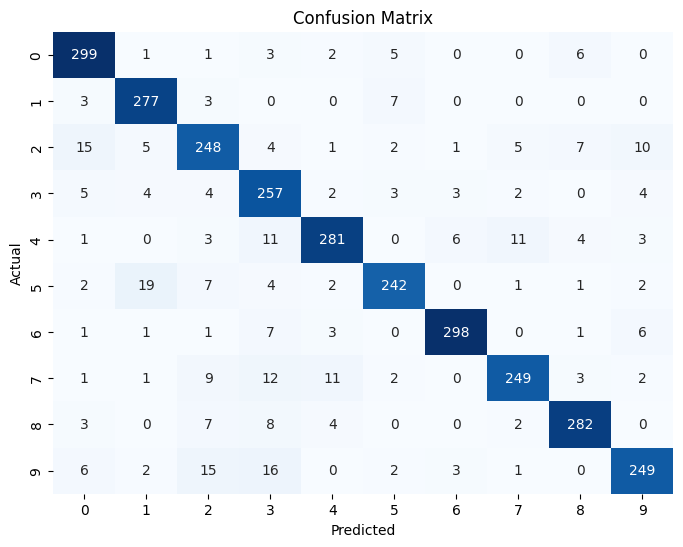

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Apply KNN algorithm to predict the results. 
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine (SVM)
SVM is known as one of the best ML model. This model takes the data point and outputs a hyperplane(a line in 2D plane) that best seperates different categories. This hyperplane is called "the decision boundary". In this case, since all the data points are not linearly seperatable, we will use a sigmoid SVM function. The sigmoid function is given by K(yn,yi) = tanh(-gamma*(yn,yi)+r)

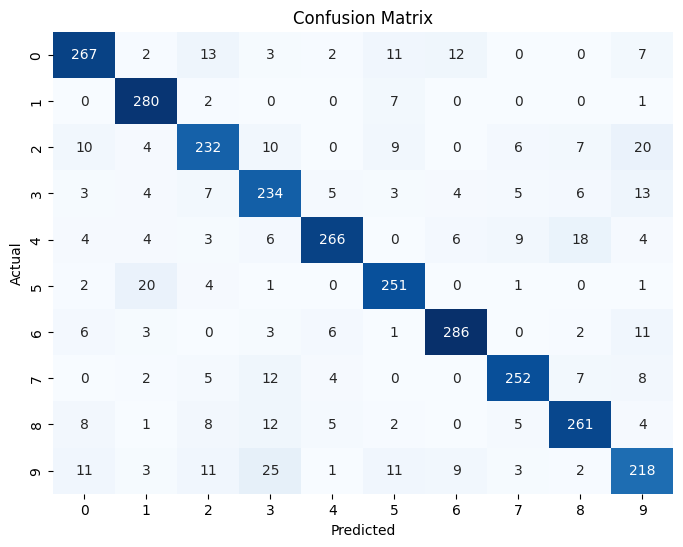

In [58]:
# Apply SVM to predict the results. The degree for the svc classifier should be set to 8. 
from sklearn.svm import SVC
svc = SVC(degree=8)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Convolutional Neural Network (CNN)
This classification method is the most suitable for classifying big data. This method is used widely in image classification. 


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

#We will be training the model using the following parameters:
# metrics = Accuracy
# epochs = 600
# loss = SparseCategoricalCrossentropy
# batch_size = 256
# optimizer = Adam

# Define a function which trains the model by inputing parameters model, epochs, optimizer. 
def train_model(model, X_train, y_train, X_val, y_val, epochs, batch_size, optimizer, loss, metrics):
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
    return history


In [65]:
# Create a validation plot which is used to see the history of validation accuracy. The function should also print the history in addition to the plot. 
def plot_validation_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue', marker='o')
    plt.title('Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Printing the history
    print("Validation Accuracy:")
    for epoch, acc in enumerate(history.history['val_accuracy'], 1):
        print(f"Epoch {epoch}: {acc:.4f}")

## Keras 
Keras is a high level API of tensorflow2. It provides essential abstractions and building blocks for developing and shipping ML solutions with high iteration velocity. 

In [70]:
#Use different layers to train the neural network by importing keras library. 
# for input and hidden neurons we use the most widly used activation function which is relu where as for output neurons we uses softmax activation function
model = Sequential()

# Input layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1], )))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

In [71]:
history = train_model(model, X_train, y_train, X_test, y_test, epochs=600, batch_size=256, optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/600
28/28 [==============================] - 4s 32ms/step - loss: 1.9934 - accuracy: 0.2996 - val_loss: 1.6630 - val_accuracy: 0.4348
Epoch 2/600
28/28 [==============================] - 0s 11ms/step - loss: 1.4268 - accuracy: 0.5168 - val_loss: 1.2536 - val_accuracy: 0.5626
Epoch 3/600
28/28 [==============================] - 0s 11ms/step - loss: 1.1257 - accuracy: 0.6140 - val_loss: 1.0515 - val_accuracy: 0.6216
Epoch 4/600
28/28 [==============================] - 0s 11ms/step - loss: 0.9587 - accuracy: 0.6678 - val_loss: 0.9484 - val_accuracy: 0.6680
Epoch 5/600
28/28 [==============================] - 0s 11ms/step - loss: 0.8540 - accuracy: 0.7099 - val_loss: 0.8654 - val_accuracy: 0.6997
Epoch 6/600
28/28 [==============================] - 0s 11ms/step - loss: 0.7669 - accuracy: 0.7415 - val_loss: 0.8111 - val_accuracy: 0.7140
Epoch 7/600
28/28 [==============================] - 0s 11ms/step - loss: 0.7044 - accuracy: 0.7630 - val_loss: 0.7542 - val_accuracy: 0.7414
Epoch 

28/28 [==============================] - 0s 12ms/step - loss: 0.0287 - accuracy: 0.9973 - val_loss: 0.5140 - val_accuracy: 0.8669
Epoch 59/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0263 - accuracy: 0.9980 - val_loss: 0.5073 - val_accuracy: 0.8685
Epoch 60/600
28/28 [==============================] - 0s 10ms/step - loss: 0.0234 - accuracy: 0.9989 - val_loss: 0.5128 - val_accuracy: 0.8662
Epoch 61/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0221 - accuracy: 0.9991 - val_loss: 0.5210 - val_accuracy: 0.8675
Epoch 62/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0207 - accuracy: 0.9991 - val_loss: 0.5310 - val_accuracy: 0.8672
Epoch 63/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0229 - accuracy: 0.9979 - val_loss: 0.5304 - val_accuracy: 0.8679
Epoch 64/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0183 - accuracy: 0.9996 - val_loss: 0.5319 - val_accuracy: 0.8685
Epoch 65/600

28/28 [==============================] - 0s 11ms/step - loss: 0.0068 - accuracy: 0.9991 - val_loss: 0.6691 - val_accuracy: 0.8725
Epoch 116/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0093 - accuracy: 0.9983 - val_loss: 0.6761 - val_accuracy: 0.8712
Epoch 117/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0048 - accuracy: 0.9993 - val_loss: 0.6661 - val_accuracy: 0.8745
Epoch 118/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.6703 - val_accuracy: 0.8722
Epoch 119/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.6869 - val_accuracy: 0.8699
Epoch 120/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.6727 - val_accuracy: 0.8735
Epoch 121/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.6750 - val_accuracy: 0.8742
Epoch 

Epoch 172/600
28/28 [==============================] - 0s 10ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.7250 - val_accuracy: 0.8729
Epoch 173/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.7130 - val_accuracy: 0.8799
Epoch 174/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.7089 - val_accuracy: 0.8809
Epoch 175/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.7105 - val_accuracy: 0.8805
Epoch 176/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.7129 - val_accuracy: 0.8812
Epoch 177/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.7200 - val_accuracy: 0.8805
Epoch 178/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.7162 - val_accuracy:

Epoch 229/600
28/28 [==============================] - 0s 9ms/step - loss: 0.1462 - accuracy: 0.9584 - val_loss: 0.9380 - val_accuracy: 0.8502
Epoch 230/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0735 - accuracy: 0.9765 - val_loss: 0.9178 - val_accuracy: 0.8612
Epoch 231/600
28/28 [==============================] - 0s 10ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.8071 - val_accuracy: 0.8662
Epoch 232/600
28/28 [==============================] - 0s 10ms/step - loss: 0.0174 - accuracy: 0.9956 - val_loss: 0.7741 - val_accuracy: 0.8725
Epoch 233/600
28/28 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.7722 - val_accuracy: 0.8719
Epoch 234/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.7930 - val_accuracy: 0.8765
Epoch 235/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.7672 - val_accuracy: 0

Epoch 286/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.8133 - val_accuracy: 0.8789
Epoch 287/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.8127 - val_accuracy: 0.8785
Epoch 288/600
28/28 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.8153 - val_accuracy: 0.8772
Epoch 289/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.8155 - val_accuracy: 0.8769
Epoch 290/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.8284 - val_accuracy: 0.8749
Epoch 291/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.8299 - val_accuracy: 0.8765
Epoch 292/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.8218 - val_accuracy:

Epoch 343/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.7972 - val_accuracy: 0.8742
Epoch 344/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.7905 - val_accuracy: 0.8732
Epoch 345/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.7939 - val_accuracy: 0.8749
Epoch 346/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.7930 - val_accuracy: 0.8752
Epoch 347/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.7949 - val_accuracy: 0.8739
Epoch 348/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.7959 - val_accuracy: 0.8749
Epoch 349/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.7977 - val_accuracy:

Epoch 400/600
28/28 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.8276 - val_accuracy: 0.8762
Epoch 401/600
28/28 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.9993 - val_loss: 0.8293 - val_accuracy: 0.8752
Epoch 402/600
28/28 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.8287 - val_accuracy: 0.8755
Epoch 403/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.8356 - val_accuracy: 0.8739
Epoch 404/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 0.8306 - val_accuracy: 0.8765
Epoch 405/600
28/28 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.8336 - val_accuracy: 0.8769
Epoch 406/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.8356 - val_accuracy: 

Epoch 457/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.8853 - val_accuracy: 0.8759
Epoch 458/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.8813 - val_accuracy: 0.8742
Epoch 459/600
28/28 [==============================] - 0s 13ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.8831 - val_accuracy: 0.8749
Epoch 460/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 0.8869 - val_accuracy: 0.8755
Epoch 461/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.8908 - val_accuracy: 0.8739
Epoch 462/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.8835 - val_accuracy: 0.8759
Epoch 463/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.8865 - val_accuracy:

Epoch 514/600
28/28 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.9993 - val_loss: 0.8201 - val_accuracy: 0.8809
Epoch 515/600
28/28 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.9994 - val_loss: 0.8207 - val_accuracy: 0.8812
Epoch 516/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.8211 - val_accuracy: 0.8815
Epoch 517/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.9993 - val_loss: 0.8222 - val_accuracy: 0.8822
Epoch 518/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.8250 - val_accuracy: 0.8819
Epoch 519/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.8234 - val_accuracy: 0.8829
Epoch 520/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.8340 - val_accuracy:

Epoch 571/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.8625 - val_accuracy: 0.8839
Epoch 572/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.8534 - val_accuracy: 0.8832
Epoch 573/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.9994 - val_loss: 0.8624 - val_accuracy: 0.8825
Epoch 574/600
28/28 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.8576 - val_accuracy: 0.8812
Epoch 575/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.8594 - val_accuracy: 0.8819
Epoch 576/600
28/28 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.8567 - val_accuracy: 0.8819
Epoch 577/600
28/28 [==============================] - 0s 11ms/step - loss: 8.8122e-04 - accuracy: 0.9994 - val_loss: 0.8600 - val_accur

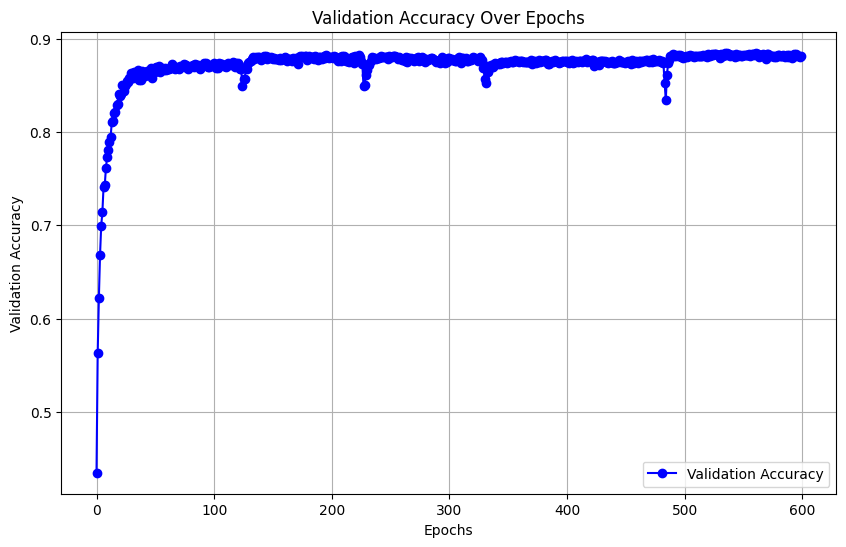

Validation Accuracy:
Epoch 1: 0.4348
Epoch 2: 0.5626
Epoch 3: 0.6216
Epoch 4: 0.6680
Epoch 5: 0.6997
Epoch 6: 0.7140
Epoch 7: 0.7414
Epoch 8: 0.7427
Epoch 9: 0.7611
Epoch 10: 0.7734
Epoch 11: 0.7808
Epoch 12: 0.7888
Epoch 13: 0.7941
Epoch 14: 0.8111
Epoch 15: 0.8121
Epoch 16: 0.8202
Epoch 17: 0.8215
Epoch 18: 0.8288
Epoch 19: 0.8295
Epoch 20: 0.8402
Epoch 21: 0.8385
Epoch 22: 0.8408
Epoch 23: 0.8498
Epoch 24: 0.8438
Epoch 25: 0.8488
Epoch 26: 0.8519
Epoch 27: 0.8549
Epoch 28: 0.8532
Epoch 29: 0.8582
Epoch 30: 0.8632
Epoch 31: 0.8582
Epoch 32: 0.8582
Epoch 33: 0.8645
Epoch 34: 0.8625
Epoch 35: 0.8609
Epoch 36: 0.8669
Epoch 37: 0.8559
Epoch 38: 0.8625
Epoch 39: 0.8552
Epoch 40: 0.8655
Epoch 41: 0.8632
Epoch 42: 0.8602
Epoch 43: 0.8635
Epoch 44: 0.8655
Epoch 45: 0.8625
Epoch 46: 0.8652
Epoch 47: 0.8682
Epoch 48: 0.8582
Epoch 49: 0.8652
Epoch 50: 0.8665
Epoch 51: 0.8639
Epoch 52: 0.8695
Epoch 53: 0.8659
Epoch 54: 0.8709
Epoch 55: 0.8645
Epoch 56: 0.8685
Epoch 57: 0.8682
Epoch 58: 0.8669
Ep

In [72]:
plot_validation_history(history)